In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [2]:
# Importing Bank data from the files

bankdata_df = pd.read_csv('D:/Downloads New/bank-additional/bank-additional/bank-additional-full.csv', header = 0, delimiter = ';', engine = 'python')

bankdatatest_df = pd.read_csv('D:/Downloads New/bank-additional/bank-additional/bank-additional.csv', header = 0, delimiter = ';', engine = 'python')

In [4]:
# Checking for nulls in Bank training data
bankdata_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Checking Nulls in Bank Test data
bankdatatest_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# Creating duplicate files which can be worked on, so that the actual data is intact

bankdata_dup = bankdata_df
bankdatatest_dup = bankdatatest_df

In [12]:
# Splitting y (target variable) from the remaining data

bankdata_dup_xtrain = bankdata_dup.iloc[:,:-1]
bankdata_dup_ytrain = bankdata_dup.iloc[:,-1]

# Doing the same for test data

bankdata_dup_xtest = bankdatatest_dup.iloc[:,:-1]
bankdata_dup_ytest = bankdatatest_dup.iloc[:,-1]

bankdata_dup_xmerged = pd.concat([bankdata_dup_xtrain, bankdata_dup_xtest], axis = 0)

# As the data has categorical variables, applying get dummies on data, so that regression can be applied on the same

bankdata_dup_xmerged = pd.get_dummies(bankdata_dup_xmerged)

bankdata_dup_xtrain = bankdata_dup_xmerged.iloc[:len(bankdata_dup_xtrain), :]
bankdata_dup_xtest = bankdata_dup_xmerged.iloc[len(bankdata_dup_xtrain):,:]

# Label Encoding

le = preprocessing.LabelEncoder()
bankdata_dup_ytrain = pd.DataFrame(le.fit_transform(bankdata_dup_ytrain))
bankdata_dup_ytest = pd.DataFrame(le.fit_transform(bankdata_dup_ytest))

In [13]:
# Fitting Naive Bayes Classifier to the data

#Fitting on Train Data

model = GaussianNB()
model.fit(bankdata_dup_xtrain, bankdata_dup_ytrain.values.ravel())
ytrain_pred = model.predict(bankdata_dup_xtrain)

In [14]:
# Accuracy score for Naive-Bayes Classifier

print('Overall accuracy for Naive Bayes classifier on train data is %f'%accuracy_score(bankdata_dup_ytrain, ytrain_pred, normalize = True))

Overall accuracy for Naive Bayes classifier on train data is 0.864475


In [15]:
# Fitting Naive Bayes model on Test data

ytest_pred = model.predict(bankdata_dup_xtest)

In [16]:
print('Overall accuracy for Naive Bayes classifier on test data is %f'%accuracy_score(bankdata_dup_ytest, ytest_pred, normalize = True))

Overall accuracy for Naive Bayes classifier on test data is 0.865259


In [17]:
# Confusion Matrix and Class scores

cm_train = confusion_matrix(bankdata_dup_ytrain, ytrain_pred, labels = None, sample_weight = None)
total_accuracy_train = (cm_train[0, 0] + cm_train[1, 1]) / np.sum(cm_train)
class1_accuracy_train = cm_train[0, 0] / np.sum(cm_train[0, :])
class2_accuracy_train = cm_train[1, 1] / np.sum(cm_train[1, :])

In [18]:
# Printing the results for Naive Bayes Classifier (Train data)

print("Confusion Matrix for train data:")
print(cm_train)
print("Overall accuracy for train data: %f" % total_accuracy_train)
print("Accuracy for Class 1 (No): %f" % class1_accuracy_train)
print("Accuracy for Class 2 (Yes): %f" % class2_accuracy_train)

Confusion Matrix for train data:
[[33214  3334]
 [ 2248  2392]]
Overall accuracy for train data: 0.864475
Accuracy for Class 1 (No): 0.908777
Accuracy for Class 2 (Yes): 0.515517


In [19]:
# Confusion Matrix and Class Scores

cm_test = confusion_matrix(bankdata_dup_ytest, ytest_pred, labels = None, sample_weight = None)
total_accuracy_test = (cm_test[0, 0] + cm_test[1, 1]) / np.sum(cm_test)
class1_accuracy_test = cm_test[0, 0] / np.sum(cm_test[0, :])
class2_accuracy_test = cm_test[1, 1] / np.sum(cm_test[1, :])

In [20]:
# Printing the results for Naive Bayes Classifier (Test data)

print("Confusion Matrix for test data:")
print(cm_test)
print("Overall accuracy for test data: %f" % total_accuracy_test)
print("Accuracy for Class 1 (No): %f" % class1_accuracy_test)
print("Accuracy for Class 2 (Yes): %f" % class2_accuracy_test)

Confusion Matrix for test data:
[[3327  341]
 [ 214  237]]
Overall accuracy for test data: 0.865259
Accuracy for Class 1 (No): 0.907034
Accuracy for Class 2 (Yes): 0.525499


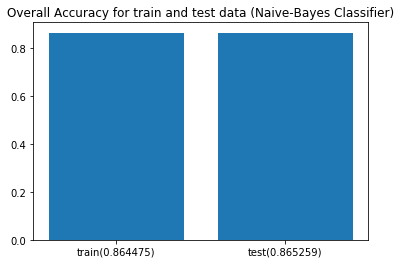

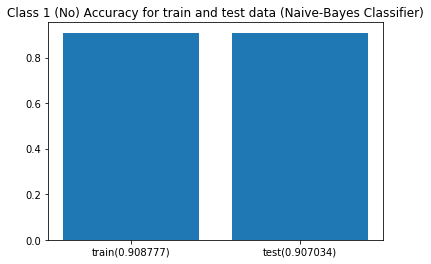

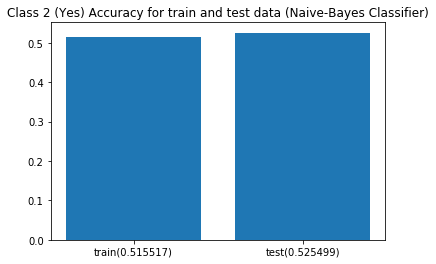

In [21]:
# Plotting the results for Naive Bayes Classifier (Train and test data)

plt.bar(x = ['train(%f)'%total_accuracy_train,'test(%f)'%total_accuracy_test], height = [total_accuracy_train, total_accuracy_test] )
plt.title("Overall Accuracy for train and test data (Naive-Bayes Classifier)")
plt.show()

plt.bar(x = ['train(%f)'%class1_accuracy_train,'test(%f)'%class1_accuracy_test], height = [class1_accuracy_train, class1_accuracy_test] )
plt.title("Class 1 (No) Accuracy for train and test data (Naive-Bayes Classifier)")
plt.show()

plt.bar(x = ['train(%f)'%class2_accuracy_train,'test(%f)'%class2_accuracy_test], height = [class2_accuracy_train, class2_accuracy_test] )
plt.title("Class 2 (Yes) Accuracy for train and test data (Naive-Bayes Classifier)")
plt.show()

In [25]:
# Fitting Logistic Regression to the data

LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(bankdata_dup_xtrain, bankdata_dup_ytrain.values.ravel())
LR_ytrain_pred = LR_model.predict(bankdata_dup_xtrain)
LR_ytest_pred = LR_model.predict(bankdata_dup_xtest)

In [26]:
# Confusion Matrix and Class scores

LR_cm_train = confusion_matrix(bankdata_dup_ytrain.values.ravel(), LR_ytrain_pred, labels = None, sample_weight = None)
LR_total_accuracy_train = (LR_cm_train[0, 0] + LR_cm_train[1, 1]) / np.sum(LR_cm_train)
LR_train_class1_accuracy = LR_cm_train[0, 0] / np.sum(LR_cm_train[0, :])
LR_train_class2_accuracy = LR_cm_train[1, 1] / np.sum(LR_cm_train[1, :])

LR_cm_test = confusion_matrix(bankdata_dup_ytest.values.ravel(), LR_ytest_pred, labels = None, sample_weight = None)
LR_total_accuracy_test = (LR_cm_test[0, 0] + LR_cm_test[1, 1]) / np.sum(LR_cm_test)
LR_test_class1_accuracy = LR_cm_test[0, 0] / np.sum(LR_cm_test[0, :])
LR_test_class2_accuracy = LR_cm_test[1, 1] / np.sum(LR_cm_test[1, :])

In [39]:
# Printing the results for Logistic Regression (train data)

print("Confusion Matrix for LR on train data:")
print(LR_cm_train)
print("Overall accuracy of LR on train data: %f" % LR_total_accuracy_train)
print("LR Accuracy for Class 1 (No): %f" % LR_train_class1_accuracy)
print("LR Accuracy for Class 2 (Yes): %f" % LR_train_class2_accuracy)

Confusion Matrix for LR on train data:
[[35614   934]
 [ 2750  1890]]
Overall accuracy of LR on train data: 0.910556
LR Accuracy for Class 1 (No): 0.974445
LR Accuracy for Class 2 (Yes): 0.407328


In [40]:
# Printing the results for Logistic Regression (test data)

print("Confusion Matrix for LR on test data:")
print(LR_cm_test)
print("Overall accuracy of LR on test data: %f" % LR_total_accuracy_test)
print("LR Accuracy for Class 1 (No): %f" % LR_test_class1_accuracy)
print("LR Accuracy for Class 2 (Yes): %f" % LR_test_class2_accuracy)

Confusion Matrix for LR on test data:
[[3576   92]
 [ 261  190]]
Overall accuracy of LR on test data: 0.914300
LR Accuracy for Class 1 (No): 0.974918
LR Accuracy for Class 2 (Yes): 0.421286


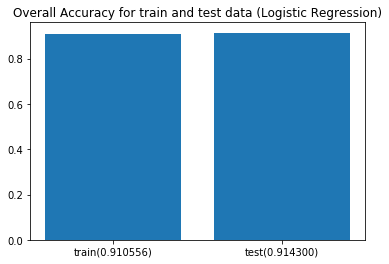

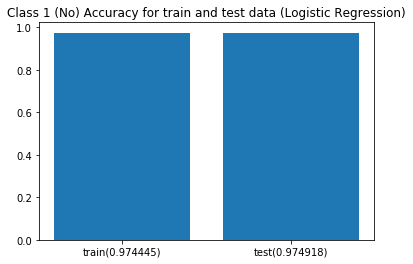

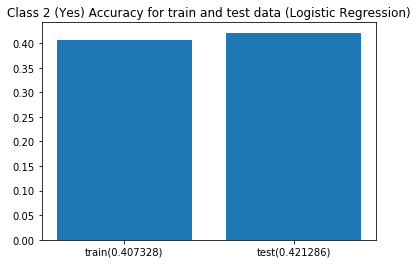

In [46]:
# Plotting the results for Logistic Regression (train and test data)

plt.bar(x = ['train(%f)'%LR_total_accuracy_train,'test(%f)'%LR_total_accuracy_test], height = [LR_total_accuracy_train, LR_total_accuracy_test] )
plt.title("Overall Accuracy for train and test data (Logistic Regression)")
plt.show()

plt.bar(x = ['train(%f)'%LR_train_class1_accuracy,'test(%f)'%LR_test_class1_accuracy], height = [LR_train_class1_accuracy, LR_test_class1_accuracy] )
plt.title("Class 1 (No) Accuracy for train and test data (Logistic Regression)")
plt.show()

plt.bar(x = ['train(%f)'%LR_train_class2_accuracy,'test(%f)'%LR_test_class2_accuracy], height = [LR_train_class2_accuracy, LR_test_class2_accuracy] )
plt.title("Class 2 (Yes) Accuracy for train and test data (Logistic Regression)")
plt.show()


In [33]:
# Fitting K-nearest neighbours classifier to the data

KNN_score = []
KNN_test_score = []
KNN_ypred = []
KNN_ytestpred = []

KNN_train_initial = 0.0
for i in range(5):
    KNN = KNeighborsClassifier(n_neighbors = i+1)
    KNN.fit(bankdata_dup_xtrain, bankdata_dup_ytrain.values.ravel()) 
    KNN_pred = KNN.predict(bankdata_dup_xtrain)
    KNN_train_accuracy = accuracy_score(bankdata_dup_ytrain.values.ravel(), KNN_pred)
    if KNN_train_accuracy > KNN_train_initial:
        k = i
        KNN_train_initial = KNN_train_accuracy
        KNN_ypred = KNN_pred
    KNN_score.append(KNN_train_accuracy)

KNN_test_initial = 0.0
for i in range(5):
    KNN_test = KNeighborsClassifier(n_neighbors = i+1)
    KNN_test.fit(bankdata_dup_xtrain, bankdata_dup_ytrain.values.ravel())  
    KNN_testpred = KNN_test.predict(bankdata_dup_xtest)
    KNN_test_accuracy = accuracy_score(bankdata_dup_ytest.values.ravel(), KNN_testpred)
    if i == k:
        KNN_ytestpred = KNN_testpred
    KNN_test_score.append(KNN_test_accuracy)

In [42]:
# Printing Overall Accuracy with varying number of neighbours (train data)

print('For train data:')

for i in range(len(KNN_score)):
    print('Overall accuracy for neighbours n = %d is %f' % (i+1, KNN_score[i]))

For train data:
Overall accuracy for neighbours n = 1 is 1.000000
Overall accuracy for neighbours n = 2 is 0.943794
Overall accuracy for neighbours n = 3 is 0.941973
Overall accuracy for neighbours n = 4 is 0.930732
Overall accuracy for neighbours n = 5 is 0.931388


In [43]:
# Printing Overall Accuracy with varying number of neighbours (test data)

print('For test data:')

for i in range(len(KNN_test_score)):
    print('Overall accuracy for neighbours n = %d is %f' % (i+1, KNN_test_score[i]))

For test data:
Overall accuracy for neighbours n = 1 is 1.000000
Overall accuracy for neighbours n = 2 is 0.943433
Overall accuracy for neighbours n = 3 is 0.939306
Overall accuracy for neighbours n = 4 is 0.932751
Overall accuracy for neighbours n = 5 is 0.931051


In [44]:
# Validating K-nearest neighbours using Class Accuracy; it should be one

KNN_cm_train = confusion_matrix(bankdata_dup_ytrain.values.ravel(), KNN_ypred, labels = None, sample_weight = None)
KNN_total_accuracy_train = (KNN_cm_train[0, 0] + KNN_cm_train[1, 1]) / np.sum(KNN_cm_train)
KNN_train_class1_accuracy = KNN_cm_train[0, 0] / np.sum(KNN_cm_train[0, :])
KNN_train_class2_accuracy = KNN_cm_train[1, 1] / np.sum(KNN_cm_train[1, :])

KNN_cm_test = confusion_matrix(bankdata_dup_ytest.values.ravel(), KNN_ytestpred, labels = None, sample_weight = None)
KNN_total_accuracy_test = (KNN_cm_test[0, 0] + KNN_cm_test[1, 1]) / np.sum(KNN_cm_test)
KNN_test_class1_accuracy = KNN_cm_test[0, 0] / np.sum(KNN_cm_test[0, :])
KNN_test_class2_accuracy = KNN_cm_test[1, 1] / np.sum(KNN_cm_test[1, :])

print('KNN accuracy for Class 1(No) on train data is %f'%KNN_train_class1_accuracy)
print('KNN accuracy for Class 1(No) on test data is %f'%KNN_test_class1_accuracy)
print('KNN accuracy for Class 2(Yes) on train data is %f'%KNN_train_class2_accuracy)
print('KNN accuracy for Class 2(Yes) on test data is %f'%KNN_test_class2_accuracy)

KNN accuracy for Class 1(No) on train data is 1.000000
KNN accuracy for Class 1(No) on test data is 1.000000
KNN accuracy for Class 2(Yes) on train data is 1.000000
KNN accuracy for Class 2(Yes) on test data is 1.000000


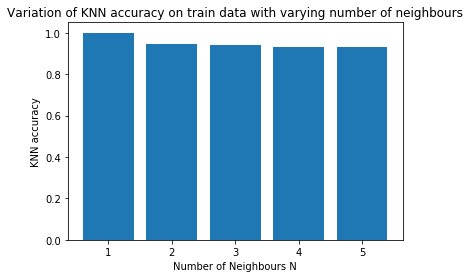

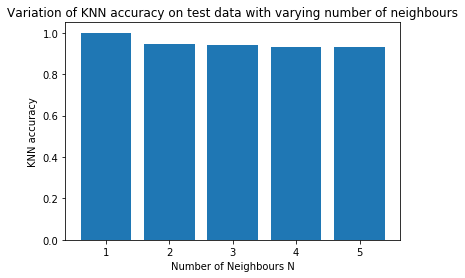

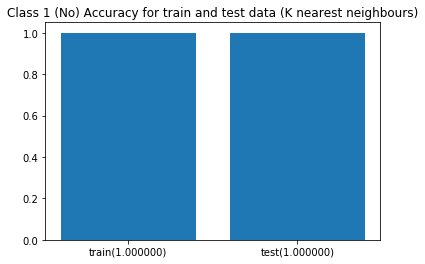

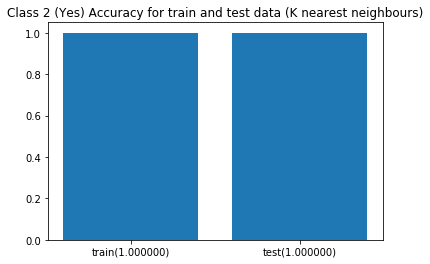

In [47]:
# Plotting the results of K-nearest neighbours (train and test data)

plt.bar(x = ['1','2','3','4','5'],height = KNN_score )
plt.title("Variation of KNN accuracy on train data with varying number of neighbours")
plt.xlabel('Number of Neighbours N')
plt.ylabel('KNN accuracy')
plt.show()

plt.bar(x = ['1','2','3','4','5'],height = KNN_test_score )
plt.title("Variation of KNN accuracy on test data with varying number of neighbours")
plt.xlabel('Number of Neighbours N')
plt.ylabel('KNN accuracy')
plt.show()

plt.bar(x = ['train(%f)'%KNN_train_class1_accuracy,'test(%f)'%KNN_test_class1_accuracy], height = [KNN_train_class1_accuracy, KNN_test_class1_accuracy] )
plt.title("Class 1 (No) Accuracy for train and test data (K nearest neighbours)")
plt.show()

plt.bar(x = ['train(%f)'%KNN_train_class2_accuracy,'test(%f)'%KNN_test_class2_accuracy], height = [KNN_train_class2_accuracy, KNN_test_class2_accuracy] )
plt.title("Class 2 (Yes) Accuracy for train and test data (K nearest neighbours)")
plt.show()